### 기본 라이브러리 불러오기 및 전처리
[Step 1] 데이터 준비/ 기본 설정



In [1]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


[Step 2] 데이터 탐색/ 전처리

In [ ]:
# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)

[Step 3] 분석에 사용할 속성을 선택

In [ ]:
rdf.info()

In [ ]:
# 분석에 활용할 열(속성)을 선택 ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환

# ndf['sex'] 원핫인코딩(판다스모듈이용)
onehot_sex = pd.get_dummies(ndf['sex'])

# onehot_sex + ndf 붙이기
ndf = pd.concat([ndf, onehot_sex], axis=1)

# ndf['embarked'] 원핫인코딩
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
# onehot_embarked + ndf 붙이기
ndf = 

# ['sex', 'embarked'] 열 삭제


In [ ]:
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [ ]:
# 속성(변수) 선택
X=         #독립 변수 X
y=         #종속 변수 Y

In [ ]:
import numpy as np
# numpy 배열로 바꾸기
x = 
y = 

In [ ]:
# 데이터 표준화
mean = 
std = 

x = 

In [ ]:
x.shape

(714, 9)

In [ ]:
# 훈련 데이터셋과 검증 데이터셋으로 나눕니다.
from sklearn.model_selection import train_test_split

# train, test 분류 8:2
x_train, x_test, y_train, y_test = 

In [ ]:
print(f'훈련데이터 {x_train.shape}, 테스트데이터 {x_test.shape}')

훈련데이터 (571, 9), 테스트데이터 (143, 9)


In [ ]:
# train, validation 분류 8:2
x_train, x_val, y_train, y_val = 


print(f'훈련데이터 {x_train.shape}, 테스트데이터 {x_test.shape}, 검증데이터 {x_val.shape}')

훈련데이터 (399, 9), 테스트데이터 (143, 9), 검증데이터 (172, 9)


### 모델 구성하기
- 모델의 마지막 Dense 층에서 별도의 활성화 함수를 사용하지 않음
  - 인자를 설정하지 않은 경우, default는 ‘linear’로 설정   
  - 이진분류일 경우에는 sigmoid를 사용
- 손실 함수는 이진분류 문제에서 주로 사용되는 binary_crossentropy를 사용


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 13차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
# 층 만들기

# 컴파일 설정
model.compile()

In [ ]:
history = model.fit(x_train, y_train, 
                    epochs = 300, 
                    validation_data = (x_val, y_val))

Epoch 1/300
13/13 [==============================] - 1s 13ms/step - loss: 0.6922 - acc: 0.5940 - val_loss: 0.6651 - val_acc: 0.6105
Epoch 2/300
13/13 [==============================] - 0s 5ms/step - loss: 0.6481 - acc: 0.6792 - val_loss: 0.6257 - val_acc: 0.7035
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6164 - acc: 0.7043 - val_loss: 0.5948 - val_acc: 0.7326
Epoch 4/300
13/13 [==============================] - 0s 5ms/step - loss: 0.5890 - acc: 0.7243 - val_loss: 0.5685 - val_acc: 0.7500
Epoch 5/300
13/13 [==============================] - 0s 5ms/step - loss: 0.5651 - acc: 0.7544 - val_loss: 0.5446 - val_acc: 0.8081
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5440 - acc: 0.7820 - val_loss: 0.5203 - val_acc: 0.8140
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5239 - acc: 0.7845 - val_loss: 0.4960 - val_acc: 0.8198
Epoch 8/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5064 - 

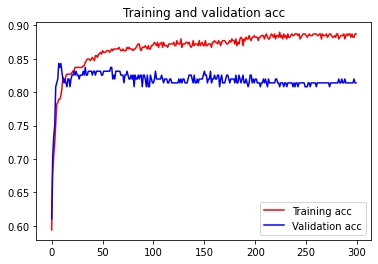

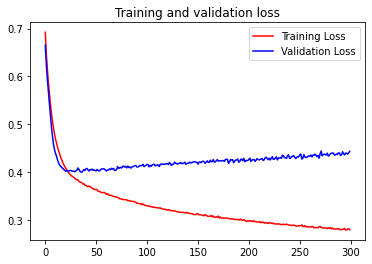

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.7613 - acc: 0.7622


[0.7613345384597778, 0.7622377872467041]

In [ ]:
# test data를 가지고 y_hat을 예측 (분류)
y_hat = model.predict(x_test) 

In [ ]:
y_hat[0]

array([0.08708724], dtype=float32)

In [ ]:
# threshold를 ( )
threshold = 0.5
y_hat[0] >= threshold

array([False])

In [ ]:
y_test[0]

0

In [ ]:
result=[]
for i in y_hat:
  if i >= threshold:
    result.append(1)
  else:
    result.append(0)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        83
           1       0.72      0.72      0.72        60

    accuracy                           0.76       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.76      0.76      0.76       143



In [ ]:
print(confusion_matrix(y_test,result))

[[66 17]
 [17 43]]
